In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import pandas as pd
import scipy.stats as stats 
import scipy.special as scpysp
#read dataset
data = pd.read_csv('../dataset/crypto.csv', header = None)

Min ,Max ,Mean ,Std ,Mode ,Median ,Var ,Skew ,Kurtosis

In [2]:
# Mendapatkan min, max, mean, std
data.describe() 

0
count  6.322180e+05
mean   2.030181e+02
std    8.678734e+03
min    2.925000e-09
25%    8.070000e-04
50%    9.733500e-03
75%    1.198202e-01
max    2.383502e+06

In [3]:
data.mean()

0    203.018146
dtype: float64

In [4]:
data.mode()

0
0  0.000002

In [5]:
data.median()

0    0.009734
dtype: float64

In [6]:
data.var()

0    7.532042e+07
dtype: float64

In [7]:
data.skew()

0    118.239608
dtype: float64

In [8]:
data.kurtosis()

0    22297.470843
dtype: float64

Plot Data dengan Hist dan Boxplot

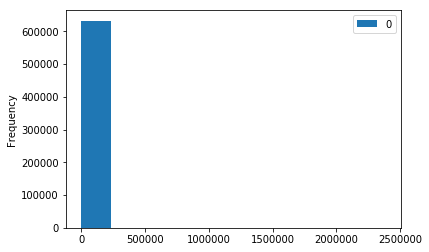

In [9]:
data.plot(kind = 'hist')

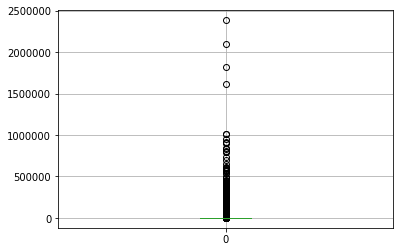

In [10]:
data.boxplot()

Dapat dilihat dari data bahwa berbentuk eksponensial maka menggunakan distrribusi gamma ,Tiap jawaban bisa menggunakan alpha dan beta berbeda sehingga membandingkan antara 3 data yaitu data asli data distribusi gamma hasil fit dan gamma dari hasil seleksi

In [11]:
#Fiting alpha beta
param = stats.gamma.fit(data[0],loc=0)
alpha = param[0]
beta = param[2]
alpha,beta

(0.26838232070787427, 118.86394010199717)

Seleksi Data

In [12]:
seleksi = data.sort_values([0])
seleksi = seleksi[:575000]
seleksi.describe()

0
count  5.750000e+05
mean   1.058894e-01
std    2.664176e-01
min    2.925000e-09
25%    6.035000e-04
50%    6.746250e-03
75%    5.403250e-02
max    1.765000e+00

In [13]:
beta_s = seleksi[0].var()/seleksi[0].mean()
alpha_s = seleksi[0].mean()/beta_s
alpha_s,beta_s

(0.157971610453582, 0.6703064409350522)

In [14]:
x_gammas = np.random.gamma(alpha,beta,len(data.index))
x_gammas_seleksi = np.random.gamma(alpha_s,beta_s,len(data.index))

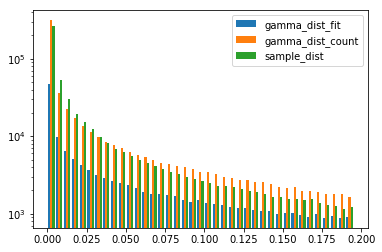

In [15]:
plt.hist([x_gammas,x_gammas_seleksi,data[0]],bins = np.arange(0,0.2,0.005),label=['gamma_dist_fit','gamma_dist_count','sample_dist'],log=True)
plt.legend(loc="upper right")
plt.show()

No 1 a

In [16]:
round(1000*(scpysp.gammainc(alpha_s,0.177*beta_s)))

755.0

In [17]:
seleksi = data.sort_values([0])
seleksi = seleksi[500000:]
seleksi.describe()

0
count  1.322180e+05
mean   9.706743e+02
std    1.895815e+04
min    2.045183e-01
25%    4.541617e-01
50%    1.277500e+00
75%    4.822500e+00
max    2.383502e+06

In [18]:
beta_s = seleksi[0].var()/seleksi[0].mean()
alpha_s = seleksi[0].mean()/beta_s
alpha_s,beta_s

(0.0026215308533123556, 370270.04380091775)

In [19]:
x_gammas_seleksi = np.random.gamma(alpha_s,beta_s,len(data.index))

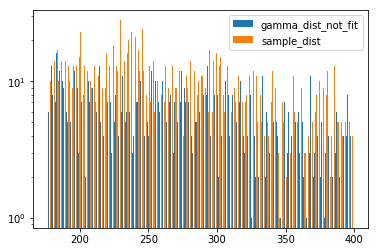

In [20]:
plt.hist([x_gammas_seleksi,data[0]],bins = np.arange(177,400,1),label=['gamma_dist_not_fit','sample_dist'],log=True)
plt.legend(loc="upper right")
plt.show()

No 1 b

In [21]:
1000*(1-scpysp.gammainc(alpha_s,177.013*beta_s))

0.0

In [22]:
seleksi = data.sort_values([0])
seleksi = seleksi[:600000]
seleksi.describe()

0
count  6.000000e+05
mean   2.274060e-01
std    6.645063e-01
min    2.925000e-09
25%    6.842500e-04
50%    7.913750e-03
75%    7.537119e-02
max    5.070000e+00

In [23]:
x_gammas_seleksi = np.random.gamma(alpha_s,beta_s,len(data.index))

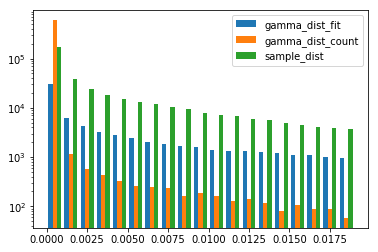

In [24]:
plt.hist([x_gammas,x_gammas_seleksi,data[0]],bins = np.arange(0,0.02,0.001),label=['gamma_dist_fit','gamma_dist_count','sample_dist'],log=True)
plt.legend(loc="upper right")
plt.show()

No 2 a

In [25]:
1 - scpysp.gammainc(alpha,0.013*beta)

0.034378807799275934

In [26]:
seleksi = data.sort_values([0])
seleksi = seleksi[:620000]
beta_s = seleksi[0].var()/seleksi[0].mean()
alpha_s = seleksi[0].mean()/beta_s
x_gammas_count = np.random.gamma(alpha_s,beta_s,len(data.index))

In [27]:
plt.hist([x_gammas,x_gammas_count,data[0]],bins = np.arange(0,18,0.5),label=['gamma_dist_fit','gamma_dist_count','sample_dist'],log=True)
plt.legend(loc="upper right")
plt.show()

No 2 b

In [28]:
scpysp.gammainc(alpha_s,17.7*beta_s)

1.0